In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_squared_error 

In [2]:
movies= pd.read_csv('D:/Simplilearn/DataScience with Python/Project/Movielens/datasets/movies.dat', sep='::',names=['MovieID','Title','Genres'],engine='python')
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating= pd.read_csv('D:/Simplilearn/DataScience with Python/Project/Movielens/datasets/ratings.dat', sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users= pd.read_csv('D:/Simplilearn/DataScience with Python/Project/Movielens/datasets/users.dat', sep='::',names=['UserID','Gender','Age','Occupation', 'Zip-Code'],engine='python')
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
movie_ratings=pd.merge(movies, rating, on='MovieID')
display(movie_ratings.head())
display(movie_ratings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [6]:
data=pd.merge(movie_ratings, users, on='UserID')
display(data.head())
display(data.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

In [7]:
display(data.info())
display(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-Code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


None

,count,mean,std,min,25%,50%,75%,max
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09
Age,1000209.0,2.973831e+01,1.175198e+01,1.0,25.0,25.0,35.0,5.600000e+01
Occupation,1000209.0,8.036138e+00,6.531336e+00,0.0,2.0,7.0,14.0,2.000000e+01


# 1.User Age Distribution

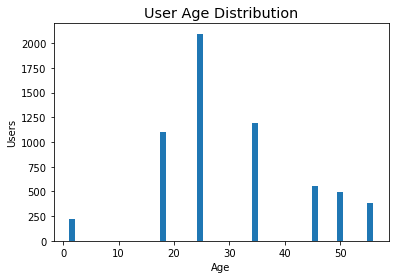

In [8]:
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Users')
plt.show()

# 2. User rating of the movie “Toy Story”

User Mean for the Movie 'Toy Story'= 4.146846413095811


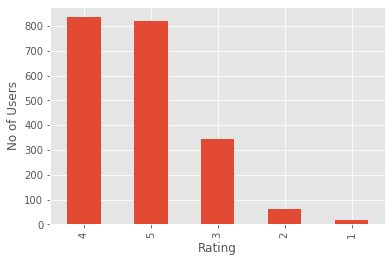

In [9]:
df_toy_story=data[data['MovieID']==1]
df_toy_story['Rating'].value_counts().plot(xlabel='Rating',ylabel='No of Users', kind="bar")
print("User Mean for the Movie 'Toy Story'=",df_toy_story['Rating'].mean())

# 3.Top 25 movies by viewership rating

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

<AxesSubplot:xlabel='Movies', ylabel='Users'>

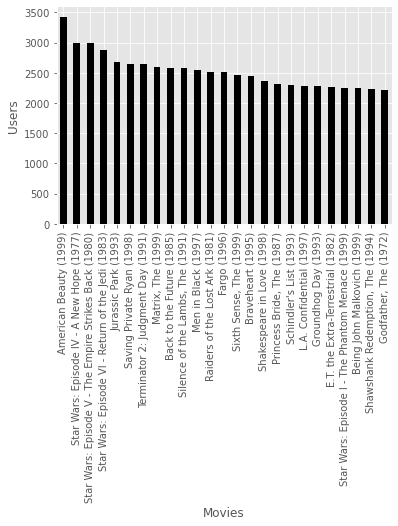

In [10]:
x=data['Title'].value_counts()[:25]
print(x)
x.plot(xlabel='Movies',ylabel='Users',kind='bar',color="black")

<AxesSubplot:xlabel='Movies', ylabel='Rating'>

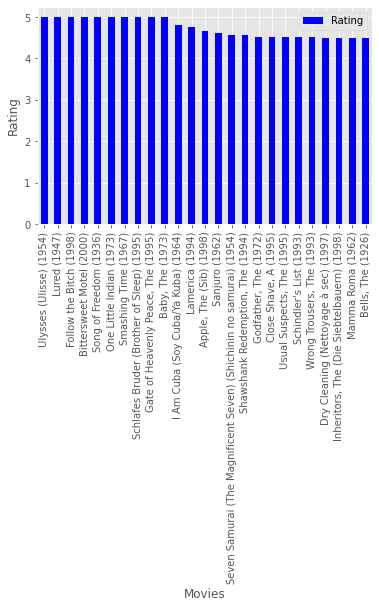

In [11]:
title_mean=pd.DataFrame(data.groupby('Title')['Rating'].mean())
title_mean_sort=title_mean.sort_values('Rating',ascending=False).head(25)
title_mean_sort.plot(xlabel='Movies',ylabel='Rating',kind='bar',color="blue")

# 4. Ratings for all  movies reviewed by a particular user id = 2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


<AxesSubplot:xlabel='Movies', ylabel='Rating'>

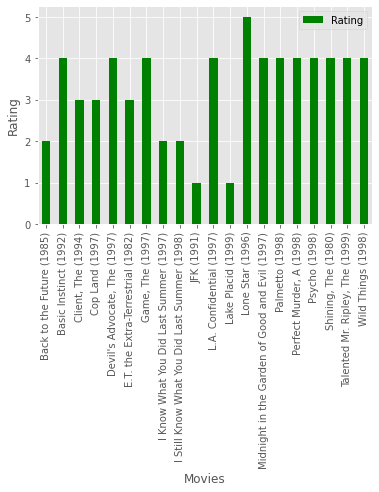

In [12]:
data_2696=data[data['UserID']==2696]
display(data_2696)
data_2696.pivot_table('Rating',index='Title').plot(xlabel='Movies',ylabel='Rating',kind='bar',color="green")

# FEATURE ENGINEERING

# 1.Find out all the unique genres 

In [13]:
#display(data.head())
data_gen=data['Genres'].str.split("|")
data_gen

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [14]:
dummy=[]
tot=len(data_gen[:5000])
for k in range(tot):
    dummy = dummy + data_gen[k]
unique_genres=list(set(dummy))
print(unique_genres)

print('\nTotal Unique Genres are',len(unique_genres))

['Adventure', 'Thriller', 'Musical', 'Crime', 'Western', "Children's", 'Romance', 'Sci-Fi', 'Mystery', 'Documentary', 'Horror', 'Fantasy', 'Film-Noir', 'War', 'Drama', 'Comedy', 'Action', 'Animation']

Total Unique Genres are 18


# 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [15]:
unique_genres=pd.Series(unique_genres)
unique_genres

0       Adventure
1        Thriller
2         Musical
3           Crime
4         Western
5      Children's
6         Romance
7          Sci-Fi
8         Mystery
9     Documentary
10         Horror
11        Fantasy
12      Film-Noir
13            War
14          Drama
15         Comedy
16         Action
17      Animation
dtype: object

In [23]:
df=pd.DataFrame()
for r in (data_gen[:5000]):
    a=unique_genres.isin(r)
    df=df.append(a,ignore_index=True)
df.columns=unique_genres

In [17]:
df1=pd.concat((data[:5000],df),axis=1).drop(columns=['UserID','Rating','Timestamp','Occupation','Zip-Code','Gender','Age'])
df1.head()

,MovieID,Title,Genres,Adventure,Thriller,Musical,Crime,Western,Children's,Romance,...,Mystery,Documentary,Horror,Fantasy,Film-Noir,War,Drama,Comedy,Action,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,150,Apollo 13 (1995),Drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,527,Schindler's List (1993),Drama|War,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# 3. Determine the features affecting the ratings of any particular movie.

<AxesSubplot:>

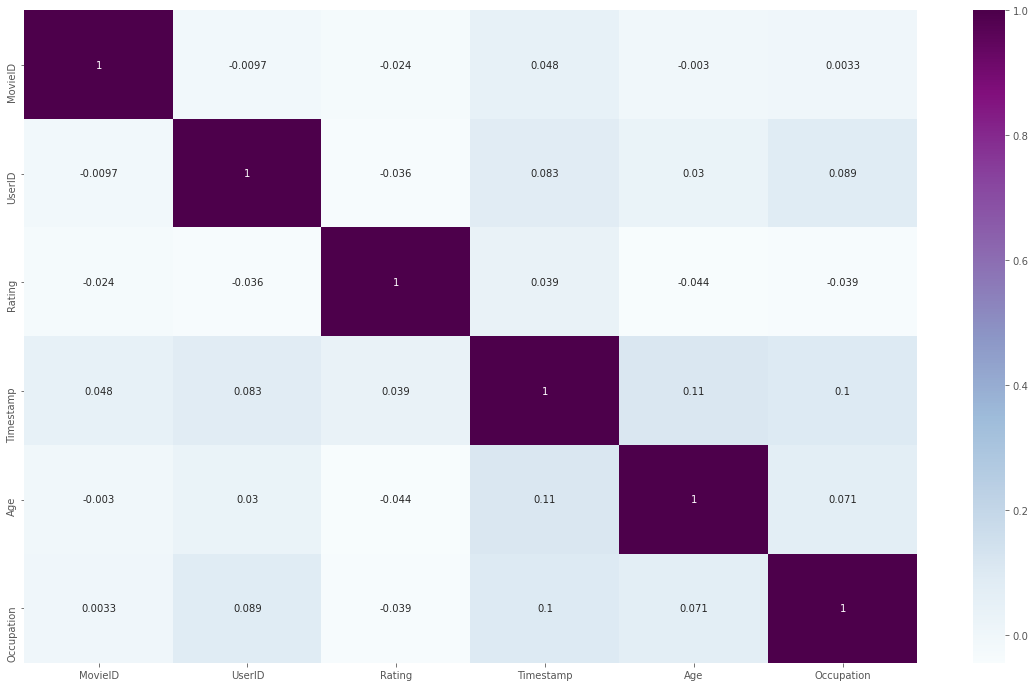

In [18]:
cor=data[:5000].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True, cmap="BuPu")
#sns.heatmap(cor,xticklabels=cor.columns.values(),yticklabels=cor.columns.values())

# 4. Develop an appropriate model to predict the movie ratings

In [19]:
fcol=['Age','Occupation']
X=data[fcol]
Y=data['Rating']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('MSE from Linear Regression Model is',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE from Linear Regression Model is 1.114668664429991


In [21]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head()

,Test,Prediction
630120,4,3.556003
229398,5,3.516949
758377,3,3.663791
159240,5,3.552903
254252,4,3.516949


# Conclusion: The model is not a fit model as the MSE is high. It can also be concluded from the test and predicted value result set as they are far from being close.